# Formating of the MPA shape file

MPA were dowlaoded from : https://github.com/ccamlr/data

Here are some ressources on the MAP in the Ross Sea (conservation measures 91-05) : https://cmir.ccamlr.org/node/1
And in the south Orkny Island : https://cm.ccamlr.org/en/measure-91-03-2009 


For the proposed MPA in the Weddell Sea, it was extracted from MPAtlas: https://mpatlas.org/services/mpas/tiles/1/0/1.pbf and then the Weddell Sea MPA was extracted in QGIS.

In [2]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray
import os


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
# To be change with local directory of the data (file too heavy to be on git)
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/data_envir/MPA')

# Load the MPA files

We load the files with the MPA information.
Then we load the file with the proposed MPA in the Wedell Sea.

### implemented MPAs

In [4]:
# Open shape file with MPA polygon
MPAs = gpd.read_file('mpasPolygon.shp')
MPAs # The 5 first rows refers to the Ross Sea MPA (Conservation measure 91-05) which is devided in several zones with differnt obejctives and limitations
# the last row refers to the South Orkney Island MPA (conservation mesure

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
0,92641,MPA RS-GPZi,GPZi,RS-GPZi,2016-12-01,None,The area bounded by a line starting where the ...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,1555850.51,"POLYGON ((180.00000 -73.50000, -180.00000 -76...."
1,92642,MPA RS-GPZii,GPZii,RS-GPZii,2016-12-01,None,The area bounded by a line starting at 62°30'S...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,74765.21,"POLYGON ((163.83333 -62.50000, 163.00000 -62.5..."
2,92643,MPA RS-GPZiii,GPZiii,RS-GPZiii,2016-12-01,None,The area bounded by a line starting at 69°S 17...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,21097.81,"POLYGON ((-179.00000 -69.00000, -179.00000 -66..."
3,92644,MPA RS-KRZ,KRZ,RS-KRZ,2016-12-01,None,The Krill Research Zone is bounded by a line s...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,328750.16,"POLYGON ((160.00000 -65.00000, 160.00000 -69.6..."
4,92645,MPA RS-SRZ,SRZ,RS-SRZ,2016-12-01,None,The Special Research Zone is bounded by a line...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,109563.21,"POLYGON ((-180.00000 -76.00000, -180.00000 -73..."
5,92652,MPA SO-SS,SOSS,SO-SS,2009-12-01,None,The South Orkney Islands southern shelf marine...,CCAMLR-XXVIII paragraphs 7.1; CM 91-03,Tim,2016-11-17,Tim,2016-11-17,93750.79,"POLYGON ((-41.00000 -61.50000, -41.00000 -64.0..."


In [5]:
MPAs.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# area of the MAP (without the Krill special area)
Ross_area = MPAs.loc[[0, 1, 2, 4]]['GAR_Size'].sum()
SOrk_area = MPAs.loc[5]['GAR_Size']
Ross_area

1761276.74

# load the xarray with KBCA and categories 
Load the array with the three categories map of krill and carbon overlap.
The goal is to exctact the polygon from the xarray.

In order to keep all the cells that belong to the MPA, we use the krill&carbon zones dataset where the cells that do not belong to one of the three categories are labeles "0" so we keep them.

In [7]:
# open the xr data
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')
zones_krill_carbon = rioxarray.open_rasterio('zones_krill_carbon.nc')
zones_krill_carbon.rio.write_crs('epsg:4326', inplace=True)
zones_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
[2700 values with dtype=float64]
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    _FillValue:                  nan
    scale_factor:                1.0
    add_offset:                  0.0

### For the South Orkney Island MPA

Crop by the polygon of the South Orkney Island.

In [8]:
# clip MPAs[5:] = the South Orkney MPA
SOrkney_krill_carbon = zones_krill_carbon.rio.clip(MPAs[5:].geometry.values, MPAs.crs, drop=False) # false so it keep the inital shape and fill with Na
SOrkney_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

Text(0.5, 1.0, 'South Orkney Island MPA')

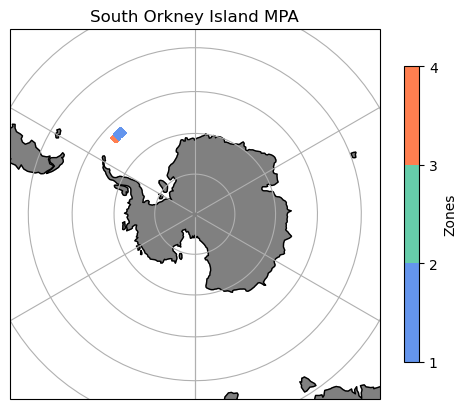

In [9]:
map_proj = ccrs.SouthPolarStereo()

p = SOrkney_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2, 3, 4], 
    colors = ['cornflowerblue','mediumaquamarine', 'coral']
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'Zones', shrink = 0.8)
plt.title('South Orkney Island MPA')

## For the Ross Sea MPA

Crop by the Ross Sea MPA expect the Krill Research Zone that is open to krill fishing.

In [59]:
MPAs.loc[[0, 1, 2, 4]]# remove line 3 with the area open to krill fishing

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
0,92641,MPA RS-GPZi,GPZi,RS-GPZi,2016-12-01,None,The area bounded by a line starting where the ...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,1555850.51,"POLYGON ((180.00000 -73.50000, -180.00000 -76...."
1,92642,MPA RS-GPZii,GPZii,RS-GPZii,2016-12-01,None,The area bounded by a line starting at 62°30'S...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,74765.21,"POLYGON ((163.83333 -62.50000, 163.00000 -62.5..."
2,92643,MPA RS-GPZiii,GPZiii,RS-GPZiii,2016-12-01,None,The area bounded by a line starting at 69°S 17...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,21097.81,"POLYGON ((-179.00000 -69.00000, -179.00000 -66..."
4,92645,MPA RS-SRZ,SRZ,RS-SRZ,2016-12-01,None,The Special Research Zone is bounded by a line...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,109563.21,"POLYGON ((-180.00000 -76.00000, -180.00000 -73..."


In [12]:
# Here put the GPZiii aside because it is straddling on the 180/-180 longitude line
Ross_krill_carbon = zones_krill_carbon.rio.clip(MPAs.loc[[0, 1, 4]].geometry.values, MPAs.crs, drop=False)
Ross_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 1.,  3.,  1., ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

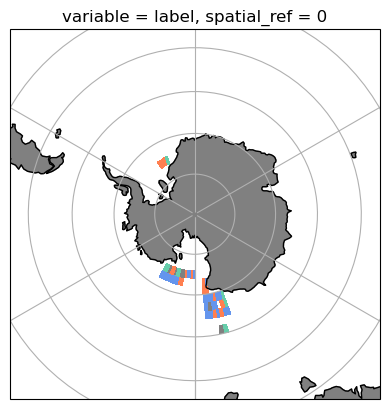

In [13]:
map_proj = ccrs.SouthPolarStereo()

p = Ross_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey', 'cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

#### solve pb of the 3 cells in the Weddell Sea

In [14]:
# put in df to solve this
Ross_krill_carbon_df = Ross_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'label'})
Ross_krill_carbon_df

,y,x,label
0,-47.0,-179.0,NaN
1,-47.0,-177.0,NaN
2,-47.0,-175.0,NaN
3,-47.0,-173.0,NaN
4,-47.0,-171.0,NaN
...,...,...,...
2695,-75.0,171.0,NaN
2696,-75.0,173.0,NaN
2697,-75.0,175.0,NaN
2698,-75.0,177.0,NaN


In [15]:
# find the cells with anormal values (longitude not in the range of the MPA
Ross_krill_carbon_df_nona = Ross_krill_carbon_df.dropna()
Ross_krill_carbon_df_nona # pb cells = 2592, 2593, 2594, 2595, 2596

,y,x,label
1432,-61.0,165.0,2.0
1433,-61.0,167.0,0.0
1790,-65.0,161.0,1.0
1791,-65.0,163.0,1.0
1792,-65.0,165.0,3.0
1793,-65.0,167.0,1.0
1794,-65.0,169.0,3.0
1795,-65.0,171.0,1.0
1796,-65.0,173.0,1.0
1970,-67.0,161.0,2.0


In [16]:
# change these cells to NaN in the Ross_krill_carbon_df
Ross_krill_carbon_df.at[2592, 'label'] = np.nan
Ross_krill_carbon_df.at[2593, 'label'] = np.nan
Ross_krill_carbon_df.at[2594, 'label'] = np.nan
Ross_krill_carbon_df.at[2595, 'label'] = np.nan
Ross_krill_carbon_df.at[2596, 'label'] = np.nan

Ross_krill_carbon_df.iloc[[2592, 2593, 2594, 2595, 2596]]

,y,x,label
2592,-75.0,-35.0,NaN
2593,-75.0,-33.0,NaN
2594,-75.0,-31.0,NaN
2595,-75.0,-29.0,NaN
2596,-75.0,-27.0,NaN


In [17]:
#Add the cell missing at the -75 latitude
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -75) & (Ross_krill_carbon_df['x'].isin([169, 171, 173, 175, 177]))]

,y,x,label
2694,-75.0,169.0,NaN
2695,-75.0,171.0,NaN
2696,-75.0,173.0,NaN
2697,-75.0,175.0,NaN
2698,-75.0,177.0,NaN


In [18]:
Ross_krill_carbon_df.at[2694, 'label'] = 2
Ross_krill_carbon_df.at[2695, 'label'] = 3
Ross_krill_carbon_df.at[2696, 'label'] = 3
Ross_krill_carbon_df.at[2697, 'label'] = 3
Ross_krill_carbon_df.at[2698, 'label'] = 3

#Ross_krill_carbon_df.iloc[[2175, 2176, 2177, 2178, 2179]]

#### Add the RS-GPZiii 
The cell of the GPZiii was put aside, now add it by hand.

In [19]:
zones_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
[2700 values with dtype=float64]
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    _FillValue:                  nan
    scale_factor:                1.0
    add_offset:                  0.0

In [21]:
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')
array_krill_carbon = xr.open_dataset('zones_krill_carbon.nc')

zones_krill_carbon_df = array_krill_carbon.to_dataframe().reset_index().drop(['variable'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'label'})
zones_krill_carbon_df

,latitude,longitude,label
0,-75,-179,1.0
1,-75,-177,3.0
2,-75,-175,1.0
3,-75,-173,1.0
4,-75,-171,3.0
...,...,...,...
2695,-47,171,NaN
2696,-47,173,NaN
2697,-47,175,NaN
2698,-47,177,NaN


In [22]:
# find the rows that belong to the MAP RS-GPZiii
print(MPAs[2:3].geometry.values)

<GeometryArray>
[<POLYGON ((-179 -69, -179 -66.75, 179 -66.75, 179 -69, -179 -69))>]
Length: 1, dtype: geometry


In [23]:
RS_GPZiii = zones_krill_carbon_df.loc[(zones_krill_carbon_df['latitude'].isin([-69, -67])) & (zones_krill_carbon_df['longitude'].isin([-179, 179]))]
RS_GPZiii

,latitude,longitude,label
540,-69,-179,3.0
719,-69,179,1.0
720,-67,-179,1.0
899,-67,179,1.0


In [24]:
# change the value in the Ross_krill_carbon_df to add the cell
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -69) & (Ross_krill_carbon_df['x'] == -179)] # position = 1980
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -69) & (Ross_krill_carbon_df['x'] == 179)] # position = 2159
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -67) & (Ross_krill_carbon_df['x'] == -179)] # position = 1800
Ross_krill_carbon_df[(Ross_krill_carbon_df['y'] == -67) & (Ross_krill_carbon_df['x'] == 179)] # position = 1979
Ross_krill_carbon_df.at[1980, 'label'] = 3
Ross_krill_carbon_df.at[2159, 'label'] = 1
Ross_krill_carbon_df.at[1800, 'label'] = 1
Ross_krill_carbon_df.at[1979, 'label'] = 1

## Plot final version

In [25]:
Ross_krill_carbon_array = xr.Dataset.from_dataframe(Ross_krill_carbon_df.set_index(['y', 'x'])) # convert into xarrayDataset
Ross_krill_carbon_array = xr.Dataset.to_array(Ross_krill_carbon_array)
Ross_krill_carbon_array

<xarray.DataArray (variable: 1, y: 15, x: 180)>
array([[[ 1.,  3.,  1., ...,  3.,  3., nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * y         (y) float64 -75.0 -73.0 -71.0 -69.0 ... -53.0 -51.0 -49.0 -47.0
  * x         (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * variable  (variable) object 'label'

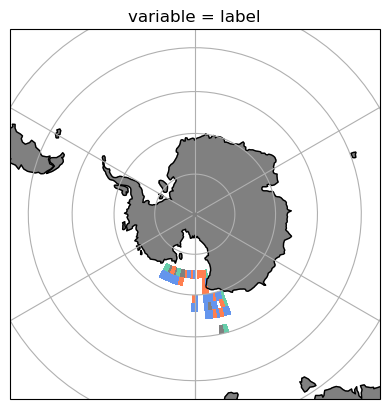

In [27]:
map_proj = ccrs.SouthPolarStereo()

p = Ross_krill_carbon_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey', 'cornflowerblue','mediumaquamarine', 'coral']
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

## check with the Special Krill Zone
Check what hapens in the zone, eventhough krill fishing is allowed.

In [28]:
# check with the SKR area => clip this to compare
check_SKR = zones_krill_carbon.rio.clip(MPAs.loc[[3]].geometry.values, MPAs.crs, drop=False)
check_SKR

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

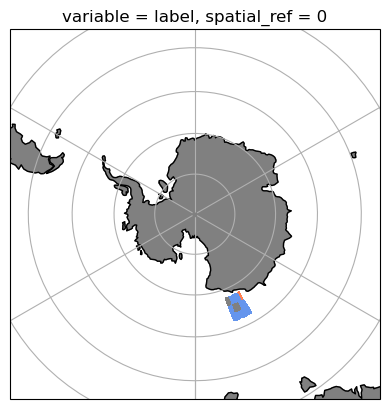

In [29]:
map_proj = ccrs.SouthPolarStereo()

p = check_SKR.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

# Proposed MPA in the Weddell Sea

In [30]:
# load the shapefile
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/data_envir/MPA')

MPA_weddell = gpd.read_file('Weddell_sea_MPA.shp')
MPA_weddell.drop(index=[1], inplace = True) # take only the general protection zone

In [31]:
# check crs
print(MPA_weddell.crs) # epsg:4326
MPA_weddell.geometry.values

epsg:4326


<GeometryArray>
[<POLYGON ((0 -69, -2 -69, -2 -69.75, -4.75 -69.75, -4.75 -69, -6.25 -69, -6....>]
Length: 1, dtype: geometry

In [32]:
# open again the zones_krill_carbon file with rasterio
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')
zones_krill_carbon = rioxarray.open_rasterio('zones_krill_carbon.nc')
zones_krill_carbon.rio.write_crs('EPSG:4326', inplace=True)
zones_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
[2700 values with dtype=float64]
Coordinates:
  * variable     (variable) <U5 'label'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  label
    _FillValue:                  nan
    scale_factor:                1.0
    add_offset:                  0.0

In [34]:
MPA_weddell.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
# clip MPAs 
Weddell_krill_carbon = zones_krill_carbon.rio.clip(MPA_weddell.geometry.values, MPA_weddell.crs, drop=False) # false so it keep the inital shape and fill with Na

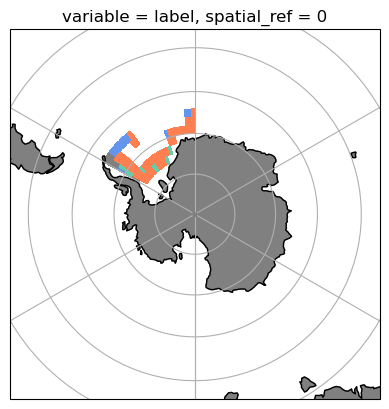

In [36]:
map_proj = ccrs.SouthPolarStereo()

p = Weddell_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

## Make datasets to store these data on MPAs and there carbon-krill categories

In [37]:
Weddell_krill_carbon_df = Weddell_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'label'})
Weddell_krill_carbon_df = Weddell_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Weddell_krill_carbon_df['Protection_status'] = 'Weddell_protected'
Weddell_krill_carbon_df

label  Protection_status
latitude longitude                          
-65.0    -59.0        0.0  Weddell_protected
         -57.0        0.0  Weddell_protected
         -55.0        0.0  Weddell_protected
         -53.0        1.0  Weddell_protected
         -51.0        1.0  Weddell_protected
...                   ...                ...
-75.0    -35.0        3.0  Weddell_protected
         -33.0        3.0  Weddell_protected
         -31.0        3.0  Weddell_protected
         -29.0        3.0  Weddell_protected
         -27.0        2.0  Weddell_protected

[83 rows x 2 columns]

In [41]:
Ross_krill_carbon_df = Ross_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Ross_krill_carbon_df['Protection_status'] = 'Ross_protected'
Ross_krill_carbon_df

label Protection_status
latitude longitude                         
-61.0     165.0       2.0    Ross_protected
          167.0       0.0    Ross_protected
-65.0     161.0       1.0    Ross_protected
          163.0       1.0    Ross_protected
          165.0       3.0    Ross_protected
          167.0       1.0    Ross_protected
          169.0       3.0    Ross_protected
          171.0       1.0    Ross_protected
          173.0       1.0    Ross_protected
-67.0    -179.0       1.0    Ross_protected
          161.0       2.0    Ross_protected
          163.0       3.0    Ross_protected
          167.0       1.0    Ross_protected
          169.0       1.0    Ross_protected
          171.0       0.0    Ross_protected
          173.0       1.0    Ross_protected
          179.0       1.0    Ross_protected
-69.0    -179.0       3.0    Ross_protected
          161.0       2.0    Ross_protected
          163.0       1.0    Ross_protected
          165.0       1.0    Ross_protected
          167.0       3.0    Ross_protected
          169.0       1.0    Ross_protected
          171.0       1.0    Ross_protected
          173.0       1.0    Ross_protected
          179.0       1.0    Ross_protected
-71.0     171.0       3.0    Ross_protected
          173.0       3.0    Ross_protected
-73.0    -169.0       3.0    Ross_protected
         -167.0       3.0    Ross_protected
         -165.0       1.0    Ross_protected
         -163.0       1.0    Ross_protected
         -161.0       1.0    Ross_protected
         -159.0       1.0    Ross_protected
         -157.0       1.0    Ross_protected
         -155.0       1.0    Ross_protected
         -153.0       1.0    Ross_protected
         -151.0       1.0    Ross_protected
          171.0       1.0    Ross_protected
          173.0       3.0    Ross_protected
-75.0    -179.0       1.0    Ross_protected
         -177.0       3.0    Ross_protected
         -175.0       1.0    Ross_protected
         -173.0       1.0    Ross_protected
         -171.0       3.0    Ross_protected
         -169.0       0.0    Ross_protected
         -167.0       0.0    Ross_protected
         -165.0       2.0    Ross_protected
         -163.0       2.0    Ross_protected
         -161.0       0.0    Ross_protected
         -159.0       3.0    Ross_protected
         -157.0       3.0    Ross_protected
         -155.0       0.0    Ross_protected
         -153.0       2.0    Ross_protected
         -151.0       2.0    Ross_protected
          169.0       2.0    Ross_protected
          171.0       3.0    Ross_protected
          173.0       3.0    Ross_protected
          175.0       3.0    Ross_protected
          177.0       3.0    Ross_protected

In [43]:
SOrkney_krill_carbon_df = SOrkney_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'label'})
SOrkney_krill_carbon_df = SOrkney_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
SOrkney_krill_carbon_df['Protection_status'] = 'SOrkney_protected'
SOrkney_krill_carbon_df

label  Protection_status
latitude longitude                          
-63.0    -47.0        3.0  SOrkney_protected
         -45.0        1.0  SOrkney_protected
         -43.0        1.0  SOrkney_protected
         -41.0        1.0  SOrkney_protected

In [44]:
# make a dataset with only the cells that are protected (Ross Sea + Sorkney islands)
mpas_carbon_df = pd.concat([Ross_krill_carbon_df, SOrkney_krill_carbon_df, Weddell_krill_carbon_df])
mpas_carbon_df # 147

label  Protection_status
latitude longitude                          
-61.0     165.0       2.0     Ross_protected
          167.0       0.0     Ross_protected
-65.0     161.0       1.0     Ross_protected
          163.0       1.0     Ross_protected
          165.0       3.0     Ross_protected
...                   ...                ...
-75.0    -35.0        3.0  Weddell_protected
         -33.0        3.0  Weddell_protected
         -31.0        3.0  Weddell_protected
         -29.0        3.0  Weddell_protected
         -27.0        2.0  Weddell_protected

[147 rows x 2 columns]

In [45]:
# Save the South Orkney island MPA and the Ross Sea mpa separately both as .nc and .cvs
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/output_results/')

# arrays of the MPA separatly 
Ross_krill_carbon_array.to_netcdf('Ross_mpa.nc')
SOrkney_krill_carbon.to_netcdf('SOrkney_mpa.nc')
Weddell_krill_carbon.to_netcdf('Weddell_mpa.nc')

# dataframe of the MPAs separatly and together with the protection status 
Ross_krill_carbon_df.to_csv('Ross_mpa.csv')
SOrkney_krill_carbon_df.to_csv('SOrkney_mpa.csv')
Weddell_krill_carbon_df.to_csv('Weddell_mpa.csv')

mpas_carbon_df.to_csv('mpas_extracted.csv')